In [11]:
import pandas as pd

# Load the CSV file
file_path = 'C:/Users/gunde/Downloads/Allergen_Status_of_Food_Products (2).csv'
data = pd.read_csv(file_path)

# Display the first few rows and general info of the data to understand its structure
data_info = data.info()
data_head = data.head()

data_info, data_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food Product                399 non-null    object 
 1   Main Ingredient             399 non-null    object 
 2   Sweetener                   119 non-null    object 
 3   Fat/Oil                     341 non-null    object 
 4   Seasoning                   379 non-null    object 
 5   Allergens                   251 non-null    object 
 6   Price ($)                   399 non-null    float64
 7   Customer rating (Out of 5)  399 non-null    float64
 8   Prediction                  398 non-null    object 
dtypes: float64(2), object(7)
memory usage: 28.2+ KB


(None,
           Food Product Main Ingredient Sweetener Fat/Oil Seasoning  \
 0       Almond Cookies         Almonds     Sugar  Butter     Flour   
 1       Almond Cookies         Almonds     Sugar  Butter     Flour   
 2  Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt   
 3  Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt   
 4       Cheddar Cheese          Cheese       NaN     NaN      Salt   
 
                 Allergens  Price ($)  Customer rating (Out of 5) Prediction  
 0   Almonds, Wheat, Dairy      10.15                         3.1   Contains  
 1   Almonds, Wheat, Dairy       6.17                         4.5   Contains  
 2  Chicken, Wheat, Celery      19.65                         4.1   Contains  
 3  Chicken, Wheat, Celery      17.48                         4.7   Contains  
 4                   Dairy      10.83                         3.7   Contains  )

In [12]:
# Step 1: Handle missing values by dropping or imputing (we'll use imputation for "Prediction")
# Check how many missing values are in each column
missing_values = data.isnull().sum()

# Impute the missing value in 'Prediction' with the most frequent value
data['Prediction'].fillna(data['Prediction'].mode()[0], inplace=True)

# Step 2: Check for duplicates in the dataset
duplicates = data.duplicated().sum()

# Step 3: Check for outliers in numerical columns using IQR method
# Outliers will be detected but not removed
numeric_columns = ['Price ($)', 'Customer rating (Out of 5)']
outliers_info = {}
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    outliers_info[column] = outliers

# Step 4: Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

# Label Encoding for the Prediction column
label_encoder = LabelEncoder()
data['Prediction'] = label_encoder.fit_transform(data['Prediction'])

# One-hot encoding for categorical feature columns
encoded_data = pd.get_dummies(data, columns=['Food Product', 'Main Ingredient', 'Sweetener', 
                                             'Fat/Oil', 'Seasoning', 'Allergens'])

# Output results to verify each step
missing_values, duplicates, outliers_info, encoded_data.head()


C:\Users\gunde\AppData\Local\Temp\ipykernel_19248\1129615876.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prediction'].fillna(data['Prediction'].mode()[0], inplace=True)


(Food Product                    0
 Main Ingredient                 0
 Sweetener                     280
 Fat/Oil                        58
 Seasoning                      20
 Allergens                     148
 Price ($)                       0
 Customer rating (Out of 5)      0
 Prediction                      1
 dtype: int64,
 0,
 {'Price ($)': 0, 'Customer rating (Out of 5)': 0},
    Price ($)  Customer rating (Out of 5)  Prediction  \
 0      10.15                         3.1           0   
 1       6.17                         4.5           0   
 2      19.65                         4.1           0   
 3      17.48                         4.7           0   
 4      10.83                         3.7           0   
 
    Food Product_Almond Cookies  Food Product_Aloo Gobi  \
 0                         True                   False   
 1                         True                   False   
 2                        False                   False   
 3                        False   

In [13]:
# Code to check for duplicates without removing any rows
# Code to check for duplicates without removing any rows
duplicates_count = data.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)


Number of duplicate rows: 0


In [14]:
# List of numerical columns to check for outliers
numeric_columns = ['Price ($)', 'Customer rating (Out of 5)']

# Dictionary to store outlier counts for each column
outliers_info = {}

# IQR method to check for outliers
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count of outliers in each column
    outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    outliers_info[column] = outliers

print("Outliers information:", outliers_info)


Outliers information: {'Price ($)': 0, 'Customer rating (Out of 5)': 0}


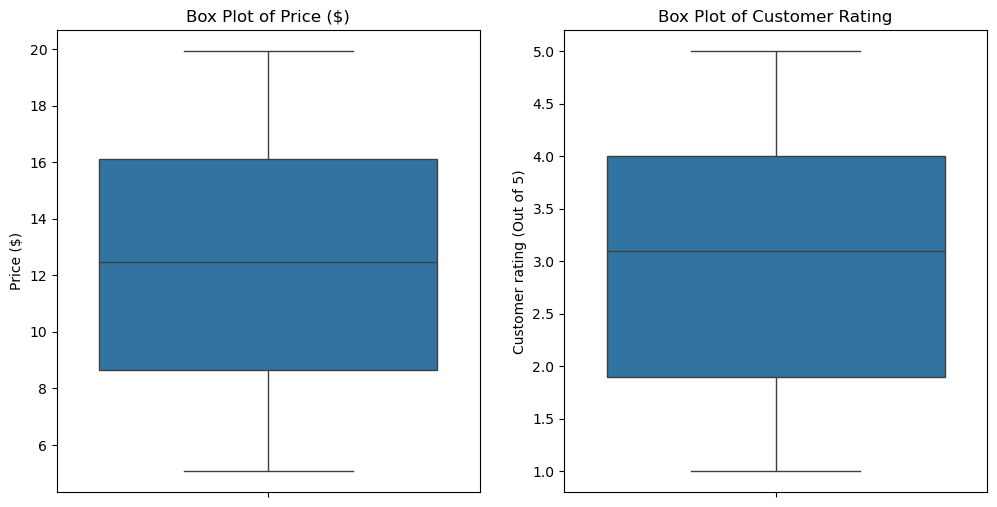

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot canvas for side-by-side boxplots
plt.figure(figsize=(12, 6))

# Plot the box plot for "Price ($)"
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Price ($)'])
plt.title('Box Plot of Price ($)')

# Plot the box plot for "Customer rating (Out of 5)"
plt.subplot(1, 2, 2)
sns.boxplot(y=data['Customer rating (Out of 5)'])
plt.title('Box Plot of Customer Rating')

# Show the plots
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label encode the 'Prediction' column
label_encoder = LabelEncoder()
data['Prediction'] = label_encoder.fit_transform(data['Prediction'])

# Display the first few rows in a tabular format
print(data.head().to_string(index=False))


       Food Product Main Ingredient Sweetener Fat/Oil Seasoning              Allergens  Price ($)  Customer rating (Out of 5)  Prediction
     Almond Cookies         Almonds     Sugar  Butter     Flour  Almonds, Wheat, Dairy      10.15                         3.1           0
     Almond Cookies         Almonds     Sugar  Butter     Flour  Almonds, Wheat, Dairy       6.17                         4.5           0
Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt Chicken, Wheat, Celery      19.65                         4.1           0
Chicken Noodle Soup   Chicken broth       NaN     NaN      Salt Chicken, Wheat, Celery      17.48                         4.7           0
     Cheddar Cheese          Cheese       NaN     NaN      Salt                  Dairy      10.83                         3.7           0


In [17]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label encode the 'Prediction' column
label_encoder = LabelEncoder()
data['Prediction'] = label_encoder.fit_transform(data['Prediction'])

# Step 2: Frequency encoding for specified columns and appending "_Freq" to encoded columns
categorical_columns = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

for column in categorical_columns:
    freq_encoding = data[column].value_counts(normalize=True)
    data[column + '_Freq'] = data[column].map(freq_encoding)

# Display the first few rows in a beautiful HTML table (only for Jupyter)
from IPython.display import display
display(data.head())


,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction,Food Product_Freq,Main Ingredient_Freq,Sweetener_Freq,Fat/Oil_Freq,Seasoning_Freq,Allergens_Freq
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,0,0.005013,0.005013,0.773109,0.249267,0.029024,0.007968
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,0,0.005013,0.005013,0.773109,0.249267,0.029024,0.007968
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",19.65,4.1,0,0.010025,0.005013,NaN,NaN,0.029024,0.007968
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",17.48,4.7,0,0.010025,0.005013,NaN,NaN,0.029024,0.007968
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,10.83,3.7,0,0.002506,0.007519,NaN,NaN,0.029024,0.330677


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your data (replace with actual file path if needed)
data = pd.read_csv('C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv')

# Separate the features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the encoded data into 70:30
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy_70 = accuracy_score(y_test, y_pred) * 100
print("Accuracy on 70:30 split (in %):", accuracy_70)

# Display classification report
print("\nClassification Report on 70:30 split:\n", classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix on 70:30 split:\n", confusion_matrix(y_test, y_pred))


Accuracy on 70:30 split (in %): 94.16666666666667

Classification Report on 70:30 split:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        87
           1       0.88      0.91      0.90        33

    accuracy                           0.94       120
   macro avg       0.92      0.93      0.93       120
weighted avg       0.94      0.94      0.94       120

Confusion Matrix on 70:30 split:
 [[83  4]
 [ 3 30]]


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your data (replace with actual file path if needed)
data = pd.read_csv('C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv')

# Separate the features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the encoded data into 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_80, y_train_80)

# Make predictions on test data
y_pred_80 = logreg.predict(X_test_80)

# Calculate accuracy
accuracy_80 = accuracy_score(y_test_80, y_pred_80) * 100
print("Accuracy on 80:20 split (in %):", accuracy_80)

# Display classification report
print("\nClassification Report on 80:20 split:\n", classification_report(y_test_80, y_pred_80))

# Display confusion matrix
print("Confusion Matrix on 80:20 split:\n", confusion_matrix(y_test_80, y_pred_80))


Accuracy on 80:20 split (in %): 97.5

Classification Report on 80:20 split:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        22

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

Confusion Matrix on 80:20 split:
 [[57  1]
 [ 1 21]]


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

# Step 1: Split the dataset into X (features) and y (target variable)
X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encoding categorical features to numerical values
X_encoded = X.apply(LabelEncoder().fit_transform)

# Encoding the target variable
y_encoded = LabelEncoder().fit_transform(y)

# Define the range of k values to test
k_values = range(1, 21)

# Perform both 80:20 and 70:30 train-test splits
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Initialize variables to store the best k and accuracy for each split
best_k_80_20, best_accuracy_80_20 = 0, 0
best_k_70_30, best_accuracy_70_30 = 0, 0

# Iterate over each k value, train the model, and evaluate accuracy for both splits
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 80:20 split accuracy
    knn.fit(X_train_80, y_train_80)
    y_pred_80 = knn.predict(X_test_80)
    accuracy_80_20 = accuracy_score(y_test_80, y_pred_80) * 100
    if accuracy_80_20 > best_accuracy_80_20:
        best_k_80_20 = k
        best_accuracy_80_20 = accuracy_80_20
    
    # 70:30 split accuracy
    knn.fit(X_train_70, y_train_70)
    y_pred_70 = knn.predict(X_test_70)
    accuracy_70_30 = accuracy_score(y_test_70, y_pred_70) * 100
    if accuracy_70_30 > best_accuracy_70_30:
        best_k_70_30 = k
        best_accuracy_70_30 = accuracy_70_30

# Display the best results for each split
print(f"Best accuracy for 80:20 split using KNN model : {best_accuracy_80_20:.2f}% ")
print(f"Best accuracy for 70:30 split using KNN model : {best_accuracy_70_30:.2f}% ")


Best accuracy for 80:20 split using KNN model : 90.00% 
Best accuracy for 70:30 split using KNN model : 88.33% 


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encoding categorical features to numerical values
X_encoded = X.apply(LabelEncoder().fit_transform)

# Encoding the target variable
y_encoded = LabelEncoder().fit_transform(y)

# Define the random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform both 80:20 and 70:30 train-test splits
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Training and evaluating the model on the 80:20 split
rf_clf.fit(X_train_80, y_train_80)
y_pred_80 = rf_clf.predict(X_test_80)
accuracy_80_20 = accuracy_score(y_test_80, y_pred_80) * 100

# Training and evaluating the model on the 70:30 split
rf_clf.fit(X_train_70, y_train_70)
y_pred_70 = rf_clf.predict(X_test_70)
accuracy_70_30 = accuracy_score(y_test_70, y_pred_70) * 100

print(f" accuracy for 80:20 split using Random forest model : {accuracy_80_20:.2f}% ")
print(f" accuracy for 70:30 split using Random forest model : {accuracy_70_30:.2f}% ")


 accuracy for 80:20 split using Random forest model : 98.75% 
 accuracy for 70:30 split using Random forest model : 99.17% 


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load and encode data as in the previous examples
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['Prediction'])
y = data['Prediction']

X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Split data for 80:20 and 70:30 ratios
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Define and train the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# 80:20 split evaluation
dt_clf.fit(X_train_80, y_train_80)
y_pred_80_dt = dt_clf.predict(X_test_80)
accuracy_80_20_dt = accuracy_score(y_test_80, y_pred_80_dt) * 100


# 70:30 split evaluation
dt_clf.fit(X_train_70, y_train_70)
y_pred_70_dt = dt_clf.predict(X_test_70)
accuracy_70_30_dt = accuracy_score(y_test_70, y_pred_70_dt) * 100


print(f"Decision Tree accuracy for 80:20 split: {accuracy_80_20_dt:.2f}%")
print(f"Decision Tree accuracy for 70:30 split: {accuracy_70_30_dt:.2f}%")


Decision Tree accuracy for 80:20 split: 98.75%
Decision Tree accuracy for 70:30 split: 98.33%


In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load and encode data as in the previous examples
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['Prediction'])
y = data['Prediction']

X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Split data for 80:20 and 70:30 ratios
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)
# Naive Bayes model
nb_clf = GaussianNB()

# 80:20 split with Naive Bayes
nb_clf.fit(X_train_80, y_train_80)
y_train_pred_80_nb = nb_clf.predict(X_train_80)
y_test_pred_80_nb = nb_clf.predict(X_test_80)
train_accuracy_80_20_nb = accuracy_score(y_train_80, y_train_pred_80_nb) * 100
test_accuracy_80_20_nb = accuracy_score(y_test_80, y_test_pred_80_nb) * 100

# 70:30 split with Naive Bayes
nb_clf.fit(X_train_70, y_train_70)
y_train_pred_70_nb = nb_clf.predict(X_train_70)
y_test_pred_70_nb = nb_clf.predict(X_test_70)
train_accuracy_70_30_nb = accuracy_score(y_train_70, y_train_pred_70_nb) * 100
test_accuracy_70_30_nb = accuracy_score(y_test_70, y_test_pred_70_nb) * 100

print(f"Naive Bayes Train accuracy for 80:20 split: {train_accuracy_80_20_nb:.2f}%")
print(f"Naive Bayes Test accuracy for 80:20 split: {test_accuracy_80_20_nb:.2f}%")
print(f"Naive Bayes Train accuracy for 70:30 split: {train_accuracy_70_30_nb:.2f}%")
print(f"Naive Bayes Test accuracy for 70:30 split: {test_accuracy_70_30_nb:.2f}%")


Naive Bayes Train accuracy for 80:20 split: 98.12%
Naive Bayes Test accuracy for 80:20 split: 96.25%
Naive Bayes Train accuracy for 70:30 split: 98.21%
Naive Bayes Test accuracy for 70:30 split: 96.67%


In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load and encode data
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encoding categorical features and target variable
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Split data for 80:20 and 70:30 ratios
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# AdaBoost model with SAMME algorithm
ada_clf = AdaBoostClassifier(random_state=42, algorithm="SAMME")

# 80:20 split with AdaBoost
ada_clf.fit(X_train_80, y_train_80)
y_train_pred_80_ada = ada_clf.predict(X_train_80)
y_test_pred_80_ada = ada_clf.predict(X_test_80)
train_accuracy_80_20_ada = accuracy_score(y_train_80, y_train_pred_80_ada) * 100
test_accuracy_80_20_ada = accuracy_score(y_test_80, y_test_pred_80_ada) * 100

# 70:30 split with AdaBoost
ada_clf.fit(X_train_70, y_train_70)
y_train_pred_70_ada = ada_clf.predict(X_train_70)
y_test_pred_70_ada = ada_clf.predict(X_test_70)
train_accuracy_70_30_ada = accuracy_score(y_train_70, y_train_pred_70_ada) * 100
test_accuracy_70_30_ada = accuracy_score(y_test_70, y_test_pred_70_ada) * 100

print(f"AdaBoost Train accuracy for 80:20 split: {train_accuracy_80_20_ada:.2f}%")
print(f"AdaBoost Test accuracy for 80:20 split: {test_accuracy_80_20_ada:.2f}%")
print(f"AdaBoost Train accuracy for 70:30 split: {train_accuracy_70_30_ada:.2f}%")
print(f"AdaBoost Test accuracy for 70:30 split: {test_accuracy_70_30_ada:.2f}%")

AdaBoost Train accuracy for 80:20 split: 98.43%
AdaBoost Test accuracy for 80:20 split: 98.75%
AdaBoost Train accuracy for 70:30 split: 98.21%
AdaBoost Test accuracy for 70:30 split: 99.17%


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv')

# Fill missing values with the mode of each column
data = data.fillna(data.mode().iloc[0])

# Split the dataset into X (features) and y (target variable)
X = data.drop('Prediction', axis=1)  # Using "Prediction" as the target column
y = data['Prediction']

# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X)

# Perform train-test splits in both 80:20 and 70:30 ratios
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to train with modified AdaBoost parameters
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=300),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Initialize a list to store results
results = []

# Train and evaluate each model using both splits
for name, model in models.items():
    # 80:20 split training and evaluation
    model.fit(X_train_80, y_train_80)
    train_accuracy_80 = accuracy_score(y_train_80, model.predict(X_train_80)) * 100
    test_accuracy_80 = accuracy_score(y_test_80, model.predict(X_test_80)) * 100
    results.append([name, '80:20', train_accuracy_80, test_accuracy_80])
    
    # 70:30 split training and evaluation
    model.fit(X_train_70, y_train_70)
    train_accuracy_70 = accuracy_score(y_train_70, model.predict(X_train_70)) * 100
    test_accuracy_70 = accuracy_score(y_test_70, model.predict(X_test_70)) * 100
    results.append([name, '70:30', train_accuracy_70, test_accuracy_70])

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Algorithm', 'Split Ratio', 'Training Accuracy', 'Testing Accuracy'])

# Display the final results table
print(results_df)

             Algorithm Split Ratio  Training Accuracy  Testing Accuracy
0  K-Nearest Neighbors       80:20          92.163009         88.750000
1  K-Nearest Neighbors       70:30          91.397849         79.166667
2  Logistic Regression       80:20         100.000000         93.750000
3  Logistic Regression       70:30         100.000000         90.833333
4             AdaBoost       80:20          91.222571         88.750000
5             AdaBoost       70:30          89.247312         80.833333
6          Naive Bayes       80:20         100.000000         88.750000
7          Naive Bayes       70:30         100.000000         87.500000
8        Decision Tree       80:20         100.000000         90.000000
9        Decision Tree       70:30         100.000000         92.500000


In [21]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load and encode data
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encoding categorical features and target variable
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Split data for 80:20 and 70:30 ratios
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# AdaBoost model with SAMME algorithm
ada_clf = AdaBoostClassifier(random_state=42, algorithm="SAMME")

# 80:20 split with AdaBoost
ada_clf.fit(X_train_80, y_train_80)
y_train_pred_80_ada = ada_clf.predict(X_train_80)
y_test_pred_80_ada = ada_clf.predict(X_test_80)
train_accuracy_80_20_ada = accuracy_score(y_train_80, y_train_pred_80_ada) * 100
test_accuracy_80_20_ada = accuracy_score(y_test_80, y_test_pred_80_ada) * 100

# 70:30 split with AdaBoost
ada_clf.fit(X_train_70, y_train_70)
y_train_pred_70_ada = ada_clf.predict(X_train_70)
y_test_pred_70_ada = ada_clf.predict(X_test_70)
train_accuracy_70_30_ada = accuracy_score(y_train_70, y_train_pred_70_ada) * 100
test_accuracy_70_30_ada = accuracy_score(y_test_70, y_test_pred_70_ada) * 100

print(f"AdaBoost Train accuracy for 80:20 split: {train_accuracy_80_20_ada:.2f}%")
print(f"AdaBoost Test accuracy for 80:20 split: {test_accuracy_80_20_ada:.2f}%")
print(f"AdaBoost Train accuracy for 70:30 split: {train_accuracy_70_30_ada:.2f}%")
print(f"AdaBoost Test accuracy for 70:30 split: {test_accuracy_70_30_ada:.2f}%")

AdaBoost Train accuracy for 80:20 split: 98.43%
AdaBoost Test accuracy for 80:20 split: 98.75%
AdaBoost Train accuracy for 70:30 split: 98.21%
AdaBoost Test accuracy for 70:30 split: 99.17%


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

# Step 1: Split the dataset into X (features) and y (target variable)
X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encoding categorical features to numerical values
X_encoded = X.apply(LabelEncoder().fit_transform)

# Encoding the target variable
y_encoded = LabelEncoder().fit_transform(y)

# Define the range of k values to test
k_values = range(1, 21)

# Perform both 80:20 and 70:30 train-test splits
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Initialize variables to store the best k, training, and testing accuracy for each split
best_k_80_20, best_train_accuracy_80_20, best_test_accuracy_80_20 = 0, 0, 0
best_k_70_30, best_train_accuracy_70_30, best_test_accuracy_70_30 = 0, 0, 0

# Iterate over each k value, train the model, and evaluate training and testing accuracy for both splits
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 80:20 split accuracies
    knn.fit(X_train_80, y_train_80)
    train_accuracy_80_20 = accuracy_score(y_train_80, knn.predict(X_train_80)) * 100
    test_accuracy_80_20 = accuracy_score(y_test_80, knn.predict(X_test_80)) * 100
    if test_accuracy_80_20 > best_test_accuracy_80_20:
        best_k_80_20 = k
        best_train_accuracy_80_20 = train_accuracy_80_20
        best_test_accuracy_80_20 = test_accuracy_80_20
    
    # 70:30 split accuracies
    knn.fit(X_train_70, y_train_70)
    train_accuracy_70_30 = accuracy_score(y_train_70, knn.predict(X_train_70)) * 100
    test_accuracy_70_30 = accuracy_score(y_test_70, knn.predict(X_test_70)) * 100
    if test_accuracy_70_30 > best_test_accuracy_70_30:
        best_k_70_30 = k
        best_train_accuracy_70_30 = train_accuracy_70_30
        best_test_accuracy_70_30 = test_accuracy_70_30

# Display the best results for each split
print(f"Best accuracy for 80:20 split using KNN model with k={best_k_80_20}:")
print(f"Training Accuracy: {best_train_accuracy_80_20:.2f}%")
print(f"Testing Accuracy: {best_test_accuracy_80_20:.2f}%\n")

print(f"Best accuracy for 70:30 split using KNN model with k={best_k_70_30}:")
print(f"Training Accuracy: {best_train_accuracy_70_30:.2f}%")
print(f"Testing Accuracy: {best_test_accuracy_70_30:.2f}%")


Best accuracy for 80:20 split using KNN model with k=1:
Training Accuracy: 99.69%
Testing Accuracy: 90.00%

Best accuracy for 70:30 split using KNN model with k=1:
Training Accuracy: 99.64%
Testing Accuracy: 88.33%


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load and encode data
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encoding categorical features to numerical values
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Split data for 80:20 and 70:30 ratios
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Define the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# 80:20 split evaluation
dt_clf.fit(X_train_80, y_train_80)
train_accuracy_80_20 = accuracy_score(y_train_80, dt_clf.predict(X_train_80)) * 100
test_accuracy_80_20 = accuracy_score(y_test_80, dt_clf.predict(X_test_80)) * 100

# 70:30 split evaluation
dt_clf.fit(X_train_70, y_train_70)
train_accuracy_70_30 = accuracy_score(y_train_70, dt_clf.predict(X_train_70)) * 100
test_accuracy_70_30 = accuracy_score(y_test_70, dt_clf.predict(X_test_70)) * 100
print(f"Training Accuracy: {train_accuracy_80_20:.2f}%")
print(f"Testing Accuracy: {test_accuracy_80_20:.2f}%\n")


print(f"Training Accuracy: {train_accuracy_70_30:.2f}%")
print(f"Testing Accuracy: {test_accuracy_70_30:.2f}%")



Training Accuracy: 99.69%
Testing Accuracy: 98.75%

Training Accuracy: 99.64%
Testing Accuracy: 98.33%


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Load and encode data
file_path ='C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encoding categorical features to numerical values
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Define the random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform both 80:20 and 70:30 train-test splits
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# 80:20 split evaluation
rf_clf.fit(X_train_80, y_train_80)
train_accuracy_80_20 = accuracy_score(y_train_80, rf_clf.predict(X_train_80)) * 100
test_accuracy_80_20 = accuracy_score(y_test_80, rf_clf.predict(X_test_80)) * 100

# 70:30 split evaluation
rf_clf.fit(X_train_70, y_train_70)
train_accuracy_70_30 = accuracy_score(y_train_70, rf_clf.predict(X_train_70)) * 100
test_accuracy_70_30 = accuracy_score(y_test_70, rf_clf.predict(X_test_70)) * 100

print(f"Training Accuracy: {train_accuracy_80_20:.2f}%")
print(f"Testing Accuracy: {test_accuracy_80_20:.2f}%\n")


print(f"Training Accuracy: {train_accuracy_70_30:.2f}%")
print(f"Testing Accuracy: {test_accuracy_70_30:.2f}%")





Training Accuracy: 99.69%
Testing Accuracy: 98.75%

Training Accuracy: 99.64%
Testing Accuracy: 99.17%


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress ConvergenceWarnings from Logistic Regression
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the data
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

# Step 1: Split the dataset into X (features) and y (target variable)
X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encoding categorical features to numerical values
X_encoded = X.apply(LabelEncoder().fit_transform)

# Encoding the target variable
y_encoded = LabelEncoder().fit_transform(y)

# Perform both 80:20 and 70:30 train-test splits
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)

# 80:20 split accuracies
log_reg.fit(X_train_80, y_train_80)
train_accuracy_80_20 = accuracy_score(y_train_80, log_reg.predict(X_train_80)) * 100
test_accuracy_80_20 = accuracy_score(y_test_80, log_reg.predict(X_test_80)) * 100

# 70:30 split accuracies
log_reg.fit(X_train_70, y_train_70)
train_accuracy_70_30 = accuracy_score(y_train_70, log_reg.predict(X_train_70)) * 100
test_accuracy_70_30 = accuracy_score(y_test_70, log_reg.predict(X_test_70)) * 100

# Display the results
print(f"Logistic Regression accuracy for 80:20 split:")
print(f"Training Accuracy: {train_accuracy_80_20:.2f}%")
print(f"Testing Accuracy: {test_accuracy_80_20:.2f}%\n")

print(f"Logistic Regression accuracy for 70:30 split:")
print(f"Training Accuracy: {train_accuracy_70_30:.2f}%")
print(f"Testing Accuracy: {test_accuracy_70_30:.2f}%")


Logistic Regression accuracy for 80:20 split:
Training Accuracy: 98.75%
Testing Accuracy: 97.50%

Logistic Regression accuracy for 70:30 split:
Training Accuracy: 98.21%
Testing Accuracy: 97.50%


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

# Step 1: Split the dataset into X (features) and y (target variable)
X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encoding categorical features to numerical values
X_encoded = X.apply(LabelEncoder().fit_transform)

# Encoding the target variable
y_encoded = LabelEncoder().fit_transform(y)

# Perform both 80:20 and 70:30 train-test splits
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# 80:20 split accuracies
nb_model.fit(X_train_80, y_train_80)
train_accuracy_80_20 = accuracy_score(y_train_80, nb_model.predict(X_train_80)) * 100
test_accuracy_80_20 = accuracy_score(y_test_80, nb_model.predict(X_test_80)) * 100

# 70:30 split accuracies
nb_model.fit(X_train_70, y_train_70)
train_accuracy_70_30 = accuracy_score(y_train_70, nb_model.predict(X_train_70)) * 100
test_accuracy_70_30 = accuracy_score(y_test_70, nb_model.predict(X_test_70)) * 100

# Display the results
print(f"Naive Bayes accuracy for 80:20 split:")
print(f"Training Accuracy: {train_accuracy_80_20:.2f}%")
print(f"Testing Accuracy: {test_accuracy_80_20:.2f}%\n")

print(f"Naive Bayes accuracy for 70:30 split:")
print(f"Training Accuracy: {train_accuracy_70_30:.2f}%")
print(f"Testing Accuracy: {test_accuracy_70_30:.2f}%")


Naive Bayes accuracy for 80:20 split:
Training Accuracy: 98.12%
Testing Accuracy: 96.25%

Naive Bayes accuracy for 70:30 split:
Training Accuracy: 98.21%
Testing Accuracy: 96.67%


In [18]:
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import ConvergenceWarning  # Import ConvergenceWarning
import pandas as pd

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load and encode data
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encode categorical features and target
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Perform both 80:20 and 70:30 train-test splits
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Initialize a list to store results
results = []

# Train and evaluate each model using both 80:20 and 70:30 splits
for model_name, model in models.items():
    # 80:20 split
    model.fit(X_train_80, y_train_80)
    train_accuracy_80_20 = accuracy_score(y_train_80, model.predict(X_train_80)) * 100
    test_accuracy_80_20 = accuracy_score(y_test_80, model.predict(X_test_80)) * 100

    # 70:30 split
    model.fit(X_train_70, y_train_70)
    train_accuracy_70_30 = accuracy_score(y_train_70, model.predict(X_train_70)) * 100
    test_accuracy_70_30 = accuracy_score(y_test_70, model.predict(X_test_70)) * 100

    # Append the results
    results.append({
        "Algorithm": model_name,
        "Training Accuracy (80:20)": train_accuracy_80_20,
        "Testing Accuracy (80:20)": test_accuracy_80_20,
        "Training Accuracy (70:30)": train_accuracy_70_30,
        "Testing Accuracy (70:30)": test_accuracy_70_30
    })

# Convert results to DataFrame and display it
results_df = pd.DataFrame(results)
print(results_df)




             Algorithm  Training Accuracy (80:20)  Testing Accuracy (80:20)  \
0        Decision Tree                  99.686520                     98.75   
1  K-Nearest Neighbors                  86.833856                     81.25   
2  Logistic Regression                  98.746082                     97.50   
3        Random Forest                  99.686520                     98.75   
4             AdaBoost                  74.608150                     72.50   
5          Naive Bayes                  98.119122                     96.25   

   Training Accuracy (70:30)  Testing Accuracy (70:30)  
0                  99.641577                 98.333333  
1                  85.304659                 80.833333  
2                  98.207885                 97.500000  
3                  99.641577                 99.166667  
4                  72.759857                 75.833333  
5                  98.207885                 96.666667  


In [3]:
# Import necessary libraries
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

# Prepare data
X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encode categorical features and target
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Perform 80:20 train-test split
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with Random Forest and parameter grid, using StratifiedKFold with 3 splits
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=3),  # Use 3-fold cross-validation to avoid the warning
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV using the 80:20 training data split
grid_search.fit(X_train_80, y_train_80)

# Get the best parameters and accuracy from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the best model on the full 80:20 training data and test it
best_model = grid_search.best_estimator_
train_accuracy = accuracy_score(y_train_80, best_model.predict(X_train_80)) * 100
test_accuracy = accuracy_score(y_test_80, best_model.predict(X_test_80)) * 100

# Print results
print("Best Parameters:", best_params)
print("Best Cross-Validated Score:", best_score)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validated Score: 0.9811614647622408
Training Accuracy: 99.37304075235109
Testing Accuracy: 98.75


In [5]:
# Import necessary libraries
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

# Prepare data
X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encode categorical features and target
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Perform 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Best parameters from previous GridSearchCV
best_params = {
    'n_estimators': 100,   # Example: replace with grid_search.best_params_['n_estimators']
    'max_depth': 20,       # Example: replace with grid_search.best_params_['max_depth']
    'min_samples_split': 5,# Example: replace with grid_search.best_params_['min_samples_split']
    'min_samples_leaf': 2  # Example: replace with grid_search.best_params_['min_samples_leaf']
}

# Initialize and train a new RandomForestClassifier with best parameters
best_model = RandomForestClassifier(
    random_state=42,
    **best_params
)
best_model.fit(X_train, y_train)

# Evaluate the retrained model on both training and test sets
train_accuracy = accuracy_score(y_train, best_model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, best_model.predict(X_test)) * 100

# Print retrained model results
print("Retrained Model - Training Accuracy:", train_accuracy)
print("Retrained Model - Testing Accuracy:", test_accuracy)


Retrained Model - Training Accuracy: 98.7460815047022
Retrained Model - Testing Accuracy: 98.75


In [9]:
# Import necessary libraries
import warnings
import pickle  # Import pickle for saving the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
file_path = 'C:/Users/gunde/OneDrive/Desktop/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

# Prepare data
X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encode categorical features and target
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Perform 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Best parameters from previous GridSearchCV (replace these with the actual best parameters found)
best_params = {
    'n_estimators': 100,   # Example: replace with grid_search.best_params_['n_estimators']
    'max_depth': 20,       # Example: replace with grid_search.best_params_['max_depth']
    'min_samples_split': 5,# Example: replace with grid_search.best_params_['min_samples_split']
    'min_samples_leaf': 2  # Example: replace with grid_search.best_params_['min_samples_leaf']
}

# Initialize and train a new RandomForestClassifier with best parameters
best_model = RandomForestClassifier(
    random_state=42,
    **best_params
)
best_model.fit(X_train, y_train)

# Evaluate the retrained model on both training and test sets
train_accuracy = accuracy_score(y_train, best_model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, best_model.predict(X_test)) * 100

# Print retrained model results
print("Retrained Model - Training Accuracy:", train_accuracy)
print("Retrained Model - Testing Accuracy:", test_accuracy)

# Save the retrained model as a pickle file
model_path = 'retrained_random_forest_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to {model_path}")

# Load the model from the pickle file to verify
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Verify by making predictions with the loaded model (optional)
loaded_test_accuracy = accuracy_score(y_test, loaded_model.predict(X_test)) * 100
print("Loaded Model - Testing Accuracy:", loaded_test_accuracy)


Retrained Model - Training Accuracy: 98.7460815047022
Retrained Model - Testing Accuracy: 98.75
Model saved to retrained_random_forest_model.pkl
Loaded Model - Testing Accuracy: 98.75


In [1]:
import pickle
import joblib
import pandas as pd

# Load the saved model
model_path = ''
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Example of unseen data (replace with actual values as per your dataset's features)
unseen_data = pd.DataFrame({
    'feature1': ['value1'],  # Replace 'feature1', 'value1' with actual feature names and values
    'feature2': ['value2'],
    'feature3': ['value3'],
    # Add all other features here as per your dataset
})

# Load each encoder and transform the corresponding column in unseen_data
for col in unseen_data.columns:
    encoder = joblib.load(f"{col}_encoder.pkl")
    unseen_data[col] = encoder.transform(unseen_data[col])

# Predict using the loaded model
predictions = loaded_model.predict(unseen_data)

# Print predictions
print("Predictions for unseen data:", predictions)


FileNotFoundError: [Errno 2] No such file or directory: 'feature1_encoder.pkl'

In [9]:
# Import necessary libraries
import warnings
import pickle
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
file_path = 'C:/Users/gunde/OneDrive/Desktop/project/Dataset/food_ingredients_and_allergens(final).csv'
data = pd.read_csv(file_path)

# Prepare data
X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Encode categorical features and target, and save encoders for each column
encoders = {}
X_encoded = X.copy()
for col in X.columns:
    encoders[col] = LabelEncoder().fit(X[col])
    X_encoded[col] = encoders[col].transform(X[col])

# Save each encoder as a .pkl file in the current directory
for col, encoder in encoders.items():
    encoder_filename = f"{col}_encoder.pkl"
    joblib.dump(encoder, encoder_filename)
    print(f"Encoder for {col} saved as {encoder_filename}")

# Encode target variable
y_encoded = LabelEncoder().fit_transform(y)

# Perform 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier with the best parameters
best_params = {
    'n_estimators': 100,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, best_model.predict(X_train)) * 100
test_accuracy = accuracy_score(y_test, best_model.predict(X_test)) * 100

print("Retrained Model - Training Accuracy:", train_accuracy)
print("Retrained Model - Testing Accuracy:", test_accuracy)

# Save the model
model_path = 'retrained_random_forest_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to {model_path}")


Encoder for Food Product saved as Food Product_encoder.pkl
Encoder for Main Ingredient saved as Main Ingredient_encoder.pkl
Encoder for Sweetener saved as Sweetener_encoder.pkl


FileNotFoundError: [Errno 2] No such file or directory: 'Fat/Oil_encoder.pkl'